In [1]:
import pandas as pd # shorter name
data = pd.Series([42.42, 3.14, 1.0])
data # default index is numeric (like a primary key in SQL)

0    42.42
1     3.14
2     1.00
dtype: float64

In [4]:
data = pd.Series([42.42, 3.14, 1.0], index=['price', 'size', 'weight']) # it's about food
# remember the Spam sketch ?
data # last evaluated expression will be printed (like in any interactive Py env.)

price     42.42
size       3.14
weight     1.00
dtype: float64

In [5]:
print(data[0]) # like a sequence (list, etc.)
print(data['price']) # like a dictionary
print(data.price) # like a dataclass instance (storing stuff in attributes)

42.42
42.42
42.42


In [6]:
data.where( (lambda x: x > 2) ) # argument is a function returning a boolean

price     42.42
size       3.14
weight      NaN
dtype: float64

In [7]:
data.where( (lambda x: x > 2) ).dropna() # get rid of Nan (which means false here)

price    42.42
size      3.14
dtype: float64

In [ ]:
# in pandas we won't have as much to worry about nan (even they could be removed also)
# when reading data sources of all kind : nan usually means "not found"

In [8]:
# Physics now
dataurl = 'http://opendata.cern.ch/record/700/files/MuRun2010B.csv'
# if you have downloaded the file into anaconda3 base directory:
# dataurl = 'MuRun2010B.csv'
# if you have downloaded into, say, c:\Users\yourid\data\MuRun2010B.csv
# dataurl = r'c:\Users\yourid\data\MuRun2010B.csv' # r prefix prevent Python to
# interpret \ in the usual special way (escaping chars)
import pandas as pd
data = pd.read_csv(dataurl) # default options, we will see if it's ok
data # each record is a experiment (set of measures at CERN), index auto generated

Run      Event Type1        E1      px1        py1       pz1  \
0      146436   90830792     G  19.17120  3.817130  9.043230 -16.46730   
1      146436   90862225     G  12.94350  5.125790 -3.983690 -11.19730   
2      146436   90644850     G  12.39990 -0.849742  9.401100   8.04015   
3      146436   90678594     G  17.81320 -1.959590  2.805310  17.48110   
4      146436   90686690     G   7.95664  7.097000 -1.316460   3.34613   
...       ...        ...   ...       ...       ...       ...       ...   
99995  147926  111123465     G   7.12024  0.753900  2.921130   6.44866   
99996  147926  111160849     G  14.26330  6.672270 -9.719310   8.02777   
99997  147926  111198433     G  15.46470  5.638970 -1.198720  14.34950   
99998  147926  111267041     G  10.34210  6.399880 -0.074015  -8.12301   
99999  147926  111310609     G  13.01730 -2.535090 -2.831540  12.44970   

            pt1      eta1      phi1  ...  Type2        E2       px2       py2  \
0       9.81583 -1.289420  1.171390  ...      T   5.43984 -0.362592  2.626990   
1       6.49180 -1.313350 -0.660674  ...      G  11.86360  4.789840 -6.262220   
2       9.43943  0.772580  1.660940  ...      G   8.55532 -4.851550  6.976960   
3       3.42195  2.333500  2.180530  ...      G   9.42174  4.365230  0.168017   
4       7.21806  0.448399 -0.183411  ...      T   5.44467 -1.341760  1.386470   
...         ...       ...       ...  ...    ...       ...       ...       ...   
99995   3.01684  1.503510  1.318220  ...      G   5.48304  4.495030  3.044660   
99996  11.78920  0.636987 -0.969191  ...      G   4.29130 -2.874230 -3.081560   
99997   5.76497  1.643170 -0.209461  ...      G  11.39340  6.334400  5.276440   
99998   6.40030 -1.059510 -0.011565  ...      G   8.27498 -6.136300  1.893890   
99999   3.80056  1.902220 -2.301010  ...      T   6.31165  0.629169 -1.933500   

            pz2      pt2      eta2      phi2  Q2         M  
0     -4.748490  2.65189 -1.345870  1.707960   1   2.73205  
1     -8.864340  7.88403 -0.966622 -0.917841   1   3.10256  
2     -0.983229  8.49797 -0.115445  2.178410  -1   9.41149  
3      8.347130  4.36846  1.403000  0.038471   1   7.74702  
4      5.090250  1.92941  1.697380  2.339810  -1   8.67727  
...         ...      ...       ...       ...  ..       ...  
99995  0.759731  5.42912  0.139484  0.595355  -1   6.61359  
99996  0.804277  4.21393  0.189721 -2.321400  -1   9.37972  
99997 -7.863410  8.24412 -0.848340  0.694531   1  22.78810  
99998 -5.217580  6.42191 -0.742373  2.842230  -1  12.85460  
99999  5.974230  2.03330  1.798720 -1.256200   1   2.79810  

[100000 rows x 21 columns]

In [9]:
data['py1'] # momentum in the x direction for particle 1 is ok

0        9.043230
1       -3.983690
2        9.401100
3        2.805310
4       -1.316460
           ...   
99995    2.921130
99996   -9.719310
99997   -1.198720
99998   -0.074015
99999   -2.831540
Name: py1, Length: 100000, dtype: float64

In [10]:
data['px1'] # what?? ok for y and z but not x ?

KeyError: 'px1'

In [11]:
# it's a mistake made at CERN, look at field names in the CSV file:
data.keys() # it's a dict

Index(['Run', 'Event', 'Type1', 'E1', 'px1 ', 'py1', 'pz1', 'pt1', 'eta1',
       'phi1', 'Q1', 'Type2', 'E2', 'px2', 'py2', 'pz2', 'pt2', 'eta2', 'phi2',
       'Q2', 'M'],
      dtype='object')

In [13]:
data.columns # same as .keys()

Index(['Run', 'Event', 'Type1', 'E1', 'px1 ', 'py1', 'pz1', 'pt1', 'eta1',
       'phi1', 'Q1', 'Type2', 'E2', 'px2', 'py2', 'pz2', 'pt2', 'eta2', 'phi2',
       'Q2', 'M'],
      dtype='object')

In [18]:
# the field name for px1 is wrong is the original source: extraneous trailing space
# it's common to have to sanitize data... let's do that first
# i can duplicate the column with the correct name and remove the bad one or rename it
# help(data.rename)
data = data.rename(columns={"px1 ":"px1"}) # old:new

In [19]:
data['px1'] # good

0        3.817130
1        5.125790
2       -0.849742
3       -1.959590
4        7.097000
           ...   
99995    0.753900
99996    6.672270
99997    5.638970
99998    6.399880
99999   -2.535090
Name: px1, Length: 100000, dtype: float64

In [20]:
data['vector sum px'] = data['px1'] + data['px2'] # total momentum in the x dir
data['vector sum py'] = data['py1'] + data['py2']
data['vector sum pz'] = data['pz1'] + data['pz2']

In [21]:
data

Run      Event Type1        E1       px1       py1       pz1  \
0      146436   90830792     G  19.17120  3.817130  9.043230 -16.46730   
1      146436   90862225     G  12.94350  5.125790 -3.983690 -11.19730   
2      146436   90644850     G  12.39990 -0.849742  9.401100   8.04015   
3      146436   90678594     G  17.81320 -1.959590  2.805310  17.48110   
4      146436   90686690     G   7.95664  7.097000 -1.316460   3.34613   
...       ...        ...   ...       ...       ...       ...       ...   
99995  147926  111123465     G   7.12024  0.753900  2.921130   6.44866   
99996  147926  111160849     G  14.26330  6.672270 -9.719310   8.02777   
99997  147926  111198433     G  15.46470  5.638970 -1.198720  14.34950   
99998  147926  111267041     G  10.34210  6.399880 -0.074015  -8.12301   
99999  147926  111310609     G  13.01730 -2.535090 -2.831540  12.44970   

            pt1      eta1      phi1  ...       py2       pz2      pt2  \
0       9.81583 -1.289420  1.171390  ...  2.626990 -4.748490  2.65189   
1       6.49180 -1.313350 -0.660674  ... -6.262220 -8.864340  7.88403   
2       9.43943  0.772580  1.660940  ...  6.976960 -0.983229  8.49797   
3       3.42195  2.333500  2.180530  ...  0.168017  8.347130  4.36846   
4       7.21806  0.448399 -0.183411  ...  1.386470  5.090250  1.92941   
...         ...       ...       ...  ...       ...       ...      ...   
99995   3.01684  1.503510  1.318220  ...  3.044660  0.759731  5.42912   
99996  11.78920  0.636987 -0.969191  ... -3.081560  0.804277  4.21393   
99997   5.76497  1.643170 -0.209461  ...  5.276440 -7.863410  8.24412   
99998   6.40030 -1.059510 -0.011565  ...  1.893890 -5.217580  6.42191   
99999   3.80056  1.902220 -2.301010  ... -1.933500  5.974230  2.03330   

           eta2      phi2  Q2         M  vector sum px  vector sum py  \
0     -1.345870  1.707960   1   2.73205       3.454538      11.670220   
1     -0.966622 -0.917841   1   3.10256       9.915630     -10.245910   
2     -0.115445  2.178410  -1   9.41149      -5.701292      16.378060   
3      1.403000  0.038471   1   7.74702       2.405640       2.973327   
4      1.697380  2.339810  -1   8.67727       5.755240       0.070010   
...         ...       ...  ..       ...            ...            ...   
99995  0.139484  0.595355  -1   6.61359       5.248930       5.965790   
99996  0.189721 -2.321400  -1   9.37972       3.798040     -12.800870   
99997 -0.848340  0.694531   1  22.78810      11.973370       4.077720   
99998 -0.742373  2.842230  -1  12.85460       0.263580       1.819875   
99999  1.798720 -1.256200   1   2.79810      -1.905921      -4.765040   

       vector sum pz  
0         -21.215790  
1         -20.061640  
2           7.056921  
3          25.828230  
4           8.436380  
...              ...  
99995       7.208391  
99996       8.832047  
99997       6.486090  
99998     -13.340590  
99999      18.423930  

[100000 rows x 24 columns]

In [22]:
# compute the momentum norm sqrt(x**2 + y**2 + z**2) still Euclidean
# don't use functions from the math module, see what happens if you do so:
import math
data['resultant momentum sum'] = \
math.sqrt(data['vector sum px']**2 + \
 data['vector sum py']**2 + \
 data['vector sum pz']**2)  # TypeError: cannot convert the series to <class 'float'>

TypeError: cannot convert the series to <class 'float'>

In [23]:
# using **(0.5) or np.sqrt work because ** is overloaded by pandas, and np knows 
# how do deal with collection (like Series)
import numpy as np
data['resultant momentum sum'] = \
np.sqrt(data['vector sum px']**2 + \
 data['vector sum py']**2 + \
 data['vector sum pz']**2)  # TypeError: cannot convert the series to <class 'float'>

In [24]:
data

Run      Event Type1        E1       px1       py1       pz1  \
0      146436   90830792     G  19.17120  3.817130  9.043230 -16.46730   
1      146436   90862225     G  12.94350  5.125790 -3.983690 -11.19730   
2      146436   90644850     G  12.39990 -0.849742  9.401100   8.04015   
3      146436   90678594     G  17.81320 -1.959590  2.805310  17.48110   
4      146436   90686690     G   7.95664  7.097000 -1.316460   3.34613   
...       ...        ...   ...       ...       ...       ...       ...   
99995  147926  111123465     G   7.12024  0.753900  2.921130   6.44866   
99996  147926  111160849     G  14.26330  6.672270 -9.719310   8.02777   
99997  147926  111198433     G  15.46470  5.638970 -1.198720  14.34950   
99998  147926  111267041     G  10.34210  6.399880 -0.074015  -8.12301   
99999  147926  111310609     G  13.01730 -2.535090 -2.831540  12.44970   

            pt1      eta1      phi1  ...       pz2      pt2      eta2  \
0       9.81583 -1.289420  1.171390  ... -4.748490  2.65189 -1.345870   
1       6.49180 -1.313350 -0.660674  ... -8.864340  7.88403 -0.966622   
2       9.43943  0.772580  1.660940  ... -0.983229  8.49797 -0.115445   
3       3.42195  2.333500  2.180530  ...  8.347130  4.36846  1.403000   
4       7.21806  0.448399 -0.183411  ...  5.090250  1.92941  1.697380   
...         ...       ...       ...  ...       ...      ...       ...   
99995   3.01684  1.503510  1.318220  ...  0.759731  5.42912  0.139484   
99996  11.78920  0.636987 -0.969191  ...  0.804277  4.21393  0.189721   
99997   5.76497  1.643170 -0.209461  ... -7.863410  8.24412 -0.848340   
99998   6.40030 -1.059510 -0.011565  ... -5.217580  6.42191 -0.742373   
99999   3.80056  1.902220 -2.301010  ...  5.974230  2.03330  1.798720   

           phi2  Q2         M  vector sum px  vector sum py  vector sum pz  \
0      1.707960   1   2.73205       3.454538      11.670220     -21.215790   
1     -0.917841   1   3.10256       9.915630     -10.245910     -20.061640   
2      2.178410  -1   9.41149      -5.701292      16.378060       7.056921   
3      0.038471   1   7.74702       2.405640       2.973327      25.828230   
4      2.339810  -1   8.67727       5.755240       0.070010       8.436380   
...         ...  ..       ...            ...            ...            ...   
99995  0.595355  -1   6.61359       5.248930       5.965790       7.208391   
99996 -2.321400  -1   9.37972       3.798040     -12.800870       8.832047   
99997  0.694531   1  22.78810      11.973370       4.077720       6.486090   
99998  2.842230  -1  12.85460       0.263580       1.819875     -13.340590   
99999 -1.256200   1   2.79810      -1.905921      -4.765040      18.423930   

       resultant momentum sum  
0                   24.458896  
1                   24.612350  
2                   18.722866  
3                   26.109869  
4                   10.212747  
...                       ...  
99995               10.728598  
99996               16.009136  
99997               14.214737  
99998               13.466728  
99999               19.125358  

[100000 rows x 25 columns]

In [25]:
# now going relativistic (Einstein)
# general form of E=mc^2 famous equation is used here
# i can use np.sqrt or **(0.5) it doesn't matter
data['invariant mass'] = np.sqrt((data['E1']+data['E2'])**2 - \
                                  data['resultant momentum sum']**2)

In [26]:
data

Run      Event Type1        E1       px1       py1       pz1  \
0      146436   90830792     G  19.17120  3.817130  9.043230 -16.46730   
1      146436   90862225     G  12.94350  5.125790 -3.983690 -11.19730   
2      146436   90644850     G  12.39990 -0.849742  9.401100   8.04015   
3      146436   90678594     G  17.81320 -1.959590  2.805310  17.48110   
4      146436   90686690     G   7.95664  7.097000 -1.316460   3.34613   
...       ...        ...   ...       ...       ...       ...       ...   
99995  147926  111123465     G   7.12024  0.753900  2.921130   6.44866   
99996  147926  111160849     G  14.26330  6.672270 -9.719310   8.02777   
99997  147926  111198433     G  15.46470  5.638970 -1.198720  14.34950   
99998  147926  111267041     G  10.34210  6.399880 -0.074015  -8.12301   
99999  147926  111310609     G  13.01730 -2.535090 -2.831540  12.44970   

            pt1      eta1      phi1  ...      pt2      eta2      phi2  Q2  \
0       9.81583 -1.289420  1.171390  ...  2.65189 -1.345870  1.707960   1   
1       6.49180 -1.313350 -0.660674  ...  7.88403 -0.966622 -0.917841   1   
2       9.43943  0.772580  1.660940  ...  8.49797 -0.115445  2.178410  -1   
3       3.42195  2.333500  2.180530  ...  4.36846  1.403000  0.038471   1   
4       7.21806  0.448399 -0.183411  ...  1.92941  1.697380  2.339810  -1   
...         ...       ...       ...  ...      ...       ...       ...  ..   
99995   3.01684  1.503510  1.318220  ...  5.42912  0.139484  0.595355  -1   
99996  11.78920  0.636987 -0.969191  ...  4.21393  0.189721 -2.321400  -1   
99997   5.76497  1.643170 -0.209461  ...  8.24412 -0.848340  0.694531   1   
99998   6.40030 -1.059510 -0.011565  ...  6.42191 -0.742373  2.842230  -1   
99999   3.80056  1.902220 -2.301010  ...  2.03330  1.798720 -1.256200   1   

              M  vector sum px  vector sum py  vector sum pz  \
0       2.73205       3.454538      11.670220     -21.215790   
1       3.10256       9.915630     -10.245910     -20.061640   
2       9.41149      -5.701292      16.378060       7.056921   
3       7.74702       2.405640       2.973327      25.828230   
4       8.67727       5.755240       0.070010       8.436380   
...         ...            ...            ...            ...   
99995   6.61359       5.248930       5.965790       7.208391   
99996   9.37972       3.798040     -12.800870       8.832047   
99997  22.78810      11.973370       4.077720       6.486090   
99998  12.85460       0.263580       1.819875     -13.340590   
99999   2.79810      -1.905921      -4.765040      18.423930   

       resultant momentum sum  invariant mass  
0                   24.458896        2.732339  
1                   24.612350        3.102325  
2                   18.722866        9.411457  
3                   26.109869        7.747046  
4                   10.212747        8.677264  
...                       ...             ...  
99995               10.728598        6.613611  
99996               16.009136        9.379805  
99997               14.214737       22.788128  
99998               13.466728       12.854684  
99999               19.125358        2.798030  

[100000 rows x 26 columns]

In [27]:
# almost done: display histogram for this field
# extract the range :
min(data['invariant mass']), \
max(data['invariant mass']) # tuple

(1.958119099640791, 109.97712963856803)

(array([1.7221e+04, 1.5891e+04, 4.9420e+03, 4.6420e+03, 4.9350e+03,
        5.2410e+03, 6.2770e+03, 5.8570e+03, 4.6010e+03, 4.0250e+03,
        3.5330e+03, 3.0710e+03, 2.6900e+03, 2.3420e+03, 1.9500e+03,
        1.6830e+03, 1.5180e+03, 1.2930e+03, 1.1200e+03, 9.3200e+02,
        7.5000e+02, 6.6600e+02, 5.5100e+02, 4.4200e+02, 4.3500e+02,
        3.6400e+02, 2.9300e+02, 2.7200e+02, 1.9400e+02, 1.9100e+02,
        1.5400e+02, 1.2300e+02, 1.3000e+02, 8.2000e+01, 9.4000e+01,
        7.2000e+01, 7.9000e+01, 8.5000e+01, 6.6000e+01, 6.0000e+01,
        5.8000e+01, 4.4000e+01, 4.6000e+01, 4.2000e+01, 2.5000e+01,
        3.5000e+01, 2.3000e+01, 2.4000e+01, 2.8000e+01, 2.1000e+01,
        2.0000e+01, 1.9000e+01, 1.7000e+01, 1.8000e+01, 1.3000e+01,
        1.6000e+01, 1.5000e+01, 1.7000e+01, 1.5000e+01, 1.4000e+01,
        1.8000e+01, 1.6000e+01, 1.6000e+01, 1.6000e+01, 8.0000e+00,
        1.6000e+01, 1.1000e+01, 1.4000e+01, 1.6000e+01, 9.0000e+00,
        2.1000e+01, 8.0000e+00, 1.1000e+01, 8.00

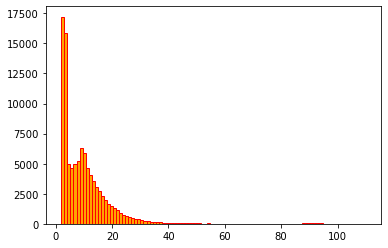

In [29]:
%matplotlib inline
from matplotlib import pyplot as plt # shorter name
plt.hist( data['invariant mass'],
         range = (min(data['invariant mass']), 
         max(data['invariant mass'])),
         bins = 100, # 100 bars
         color='orange', edgecolor='red'
        )

In [31]:
# hmm, we cannot see the peak in energy near 90Mev, let's use a log scale 
plt.hist( data['invariant mass'],
         range = (min(data['invariant mass']), 
         max(data['invariant mass'])),
         bins = 100, # 100 bars
         color='orange', edgecolor='red', log=True
        )

(array([1.7221e+04, 1.5891e+04, 4.9420e+03, 4.6420e+03, 4.9350e+03,
        5.2410e+03, 6.2770e+03, 5.8570e+03, 4.6010e+03, 4.0250e+03,
        3.5330e+03, 3.0710e+03, 2.6900e+03, 2.3420e+03, 1.9500e+03,
        1.6830e+03, 1.5180e+03, 1.2930e+03, 1.1200e+03, 9.3200e+02,
        7.5000e+02, 6.6600e+02, 5.5100e+02, 4.4200e+02, 4.3500e+02,
        3.6400e+02, 2.9300e+02, 2.7200e+02, 1.9400e+02, 1.9100e+02,
        1.5400e+02, 1.2300e+02, 1.3000e+02, 8.2000e+01, 9.4000e+01,
        7.2000e+01, 7.9000e+01, 8.5000e+01, 6.6000e+01, 6.0000e+01,
        5.8000e+01, 4.4000e+01, 4.6000e+01, 4.2000e+01, 2.5000e+01,
        3.5000e+01, 2.3000e+01, 2.4000e+01, 2.8000e+01, 2.1000e+01,
        2.0000e+01, 1.9000e+01, 1.7000e+01, 1.8000e+01, 1.3000e+01,
        1.6000e+01, 1.5000e+01, 1.7000e+01, 1.5000e+01, 1.4000e+01,
        1.8000e+01, 1.6000e+01, 1.6000e+01, 1.6000e+01, 8.0000e+00,
        1.6000e+01, 1.1000e+01, 1.4000e+01, 1.6000e+01, 9.0000e+00,
        2.1000e+01, 8.0000e+00, 1.1000e+01, 8.00

In [ ]:
# we may have won the Nobel Prize in Physics (too late)
# I'm exporting this very file (notebook) on my public repository